## Harissa demo 1 - Simulating networks

Here we use the `grnsim` module to make simulations of a simple network in different regimes.

In [15]:
# Specific to this notebook
import sys
sys.path.append("../")
%matplotlib inline

#### Step 1: load the network object and define the interactions

In [16]:
# Import the relevant packages
import numpy as np 
import harissa.grnsim as ns
# Load a 3-gene network example
from harissa.networks import net0
network = ns.load(net0)

The interaction matrix is `network.theta`, which is zero by default. Let us define a simple cascade $1 \to 2 \to 3$ :

In [17]:
# Set the interactions
network.theta[0,0] = 5 # Gene 1 is going to be activated at t = 0
network.theta[1,0] = 5 # Influence 1 -> 2
network.theta[2,1] = 5 # Influence 2 -> 3

#### Step 2: define the initial state and time-points to record

In [18]:
# Set the initial levels
network.state['M'] = 1e-2 # mRNA
network.state['P'] = 5e-2 # Proteins
# Set the steps to record
time = np.linspace(0,100,1000)

The exact simulations generate continuous time trajectories: the variable `time` is just the list of points we want to record.

#### Step 3: simulate!

The `grnsim` module actually implements three distinct models:
- the stochastic model in general regime. This is the fundamental mechanistic model. It includes a description of promoter states, which can be either active or inactive.
- the stochastic model in bursty regime. This is a reduced model in which promoter active times are infinitely short, so that mRNA is produced by *bursts* (and also proteins if their half-life is short enough). Promoters are described anymore, which results in faster simulations.
- the deterministic counterpart model, which corresponds to the limit of fast promoter dynamics compared to mRNA. Basically a non-linear ODE system. This model is provided for comparison, but we claim it is not realistic in general.

*Stochastic model, general regime*

The simulation algorithm is based on a thinning method, that is, it computes as many jumps as in the “worst case scenario”: this results in “phantom” jumps, which have no visible effect but enable the simulations to be exact. The option `info=True` displays the number of jumps used in the simulation:

Exact simulation used 2985 jumps, including 2277 phantom jumps (76.28%).


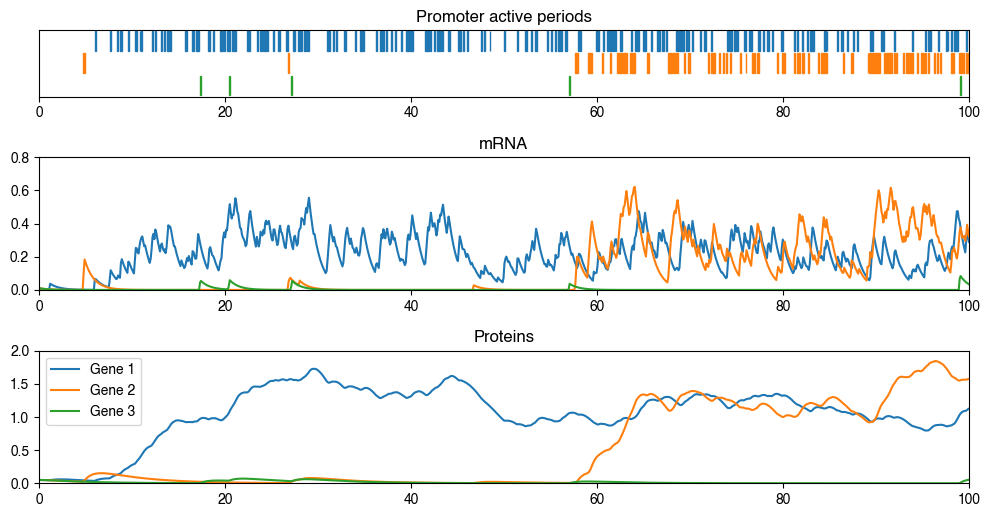

In [19]:
# Perform a simulation
simu1 = network.simulate(time, method='exact', info=True)
# Plot the results
ns.plotsim(time, simu1)

*Stochastic model, bursty regime*

The default regime when we imported `net0` was `'general'`. Let us set it to `'bursty'`:

In [7]:
network.regime = 'bursty'

In this case the thinning constant can be drastically decreased:

In [8]:
print('Previous value: {}'.format(network.thin_cst))
network.thin_cst = np.sum(network.K1)
print('New value: {}'.format(network.thin_cst))

Previous value: 30.0
New value: 9.3


Hence, the simulation is faster because of less phantom jumps:

Exact simulation used 987 jumps, including 247 phantom jumps (25.03%).


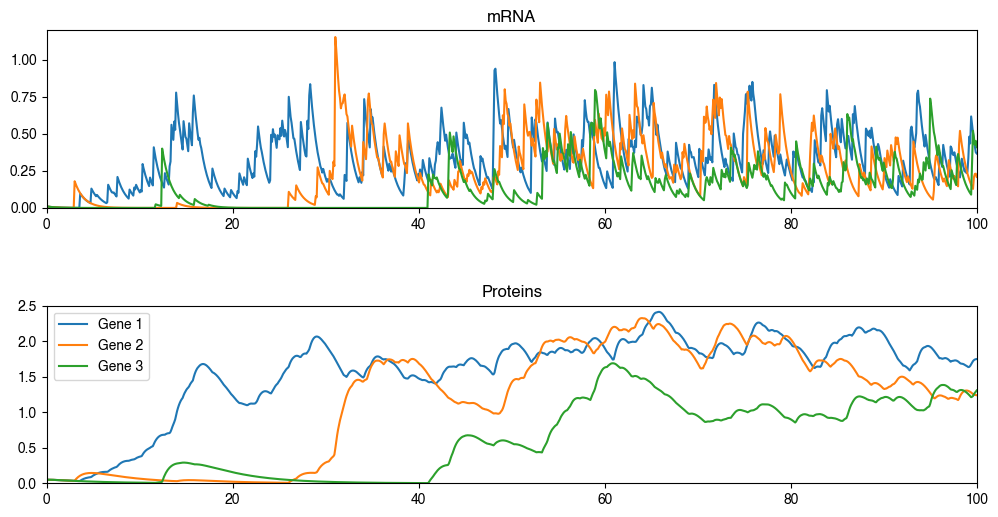

In [9]:
simu2 = network.simulate(time, method='exact', info=True)
ns.plotsim(time, simu2)

*Deterministic limit model*
In this model, the promoter noise is fully buffered by the slow mRNA dynamics, which then impact proteins:

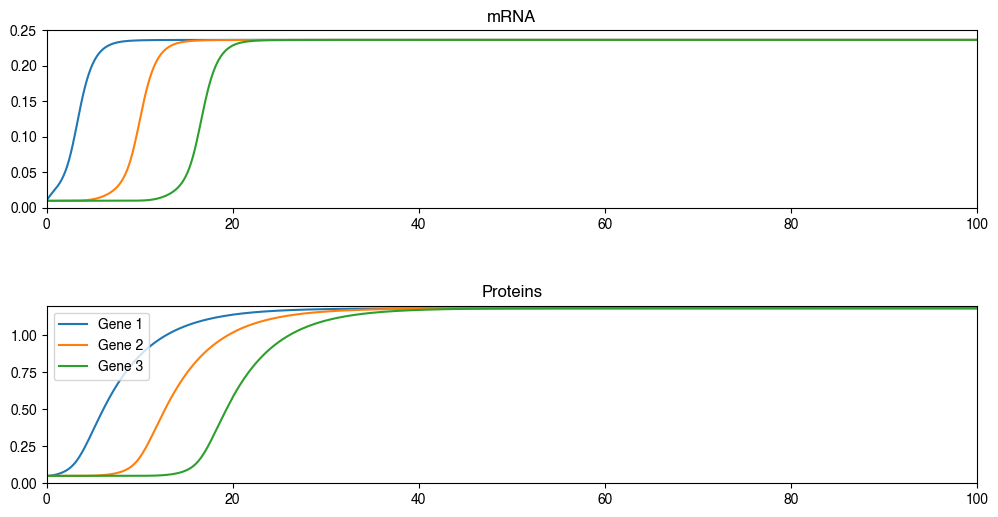

In [10]:
simu3 = network.simulate(time, method='ode')
ns.plotsim(time, simu3)

#### Bonus: distributions

Another way to look at the results is to plot histograms:

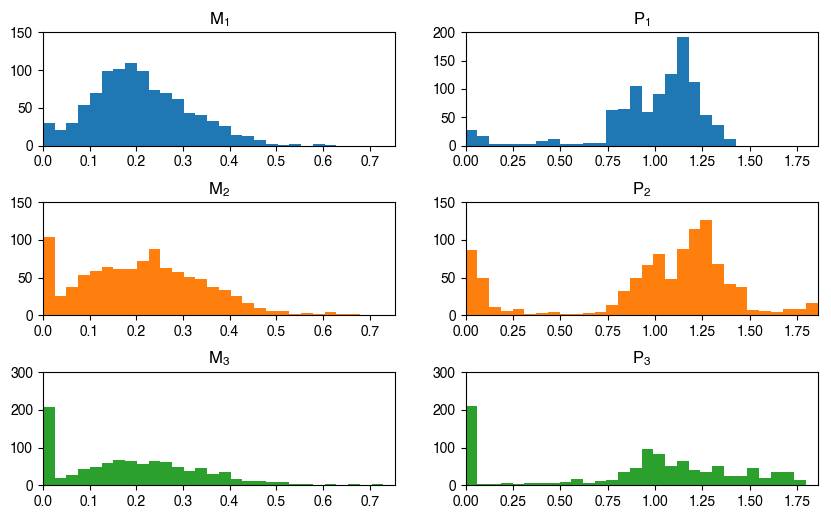

In [11]:
# Distributions from the general PDMP model
ns.histo(simu1['M'], simu1['P'])

Of course we can do it also for the bursty regime...

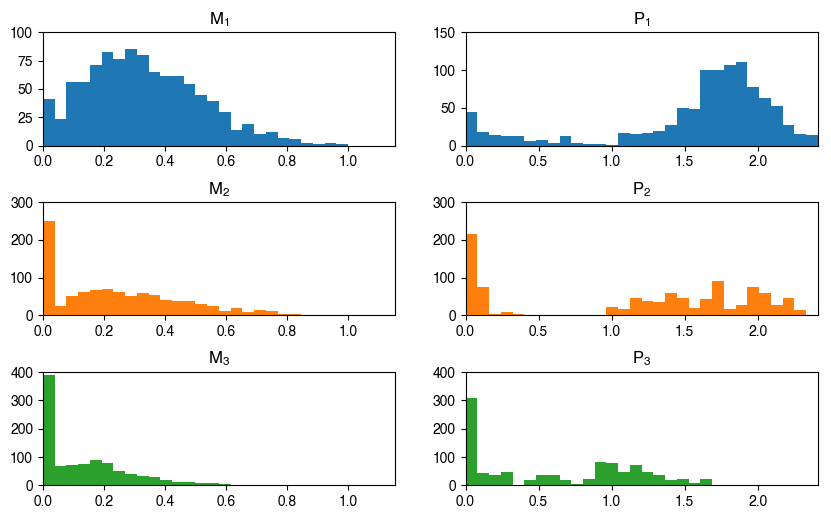

In [12]:
ns.histo(simu2['M'], simu2['P'])

...and the deterministic model, which should look much more “peaked”:

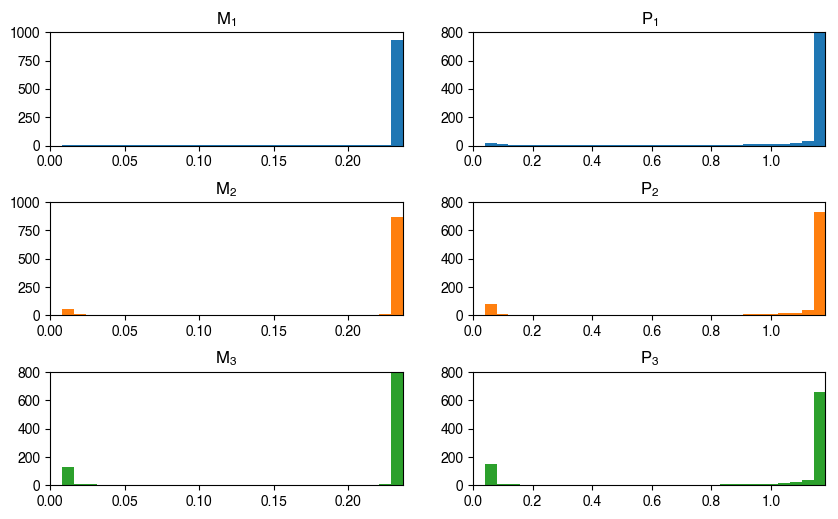

In [13]:
ns.histo(simu3['M'], simu3['P'])